## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [1276]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [1278]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

#### Q1
##### The three data sets are tidy because every variable has specific categorical data.
#### Q2
##### The three data sets don't all contain the same number of observations. The first data set has 8 observations, the second data set has 10 observations, and the third data set has 9 observations.
#### Q3
##### The five variables in all three of these data sets are 'name', 'birth_year', 'profession', and 'known_for'.
#### Q4
##### The one variable that all three data sets have in common (the only thing we can join on) is 'name'.

## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [1282]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

In [1284]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Rosalind Franklin,NaN,NaN,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


#### Q5
##### When I switched the how='right' from how='left' the first two names, Ada Lovelace and Marie Curie, were earased. This would be because it only counted the data that was on the right side of the set.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [1287]:
DF_6 = pd.merge(DF_professions,DF_dates,on='name',how='inner')
DF_6

,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0
5,Gladys West,Mathematician,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,1947,NaN
7,Jennifer Doudna,Biochemist,1964,NaN


#### Q6
##### In the code above I used the '.merge()' command to combine the "professions" and "dates" data frames. Additionally, I specifically marged these data frames by the 'name' column. However, I chose to merge the 'names' by 'inner' so only the names that we displayed in BOTH data frames could appear in the data frame above. 

## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [1289]:
# only the professions and works are merged
DF_7 = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_7
# merge with dates
DF_7 = pd.merge(DF_scientists,DF_dates,on='name',how='right',indicator=True)
DF_7
# mask to only keep rows where _merge is set to ‘both’ (I'm lost on the '_merge' part
mask = DF_7['_merge']=='both'
DF_7 = DF_7[mask]
DF_7

,name,profession,known_for,birth_year_x,death_year_x,birth_year_y,death_year_y,_merge
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0,1897,1984.0,both
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0,1912,1997.0,both
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0,1918,2020.0,both
3,Rosalind Franklin,NaN,NaN,1920,1958.0,1920,1958.0,both
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0,1928,2016.0,both
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN,1930,NaN,both
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN,1947,NaN,both
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN,1964,NaN,both


#### Q7
##### In the code above I used the '.merge()' command to combine the "professions" and "works" data frames. Additionally, I chose to merge these data frames by the 'name' column and created it into it's own data frame. Then, I used the '.merge()' command again to combine the data frame I recently created with the "dates" data frame using the 'name' column. Finally, I used the '_merge' command and set it to exactly equal 'both' so the new data frame would only keep the 'names' that appeared in all three data frames.

## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [1291]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [1293]:
# "how=outer"
DF_total = pd.merge(DF_purchases, DF_prices,on='item',how='outer')
DF_total

,customer_id,item,price
0,NaN,avocado,0.50
1,1.0,banana,0.15
2,1.0,bread,1.00
3,1.0,milk,0.80
4,2.0,milk,0.80
5,2.0,toilet paper,3.00


##### Combining the "purchases" and "prices" data frames by 'outer' merged all of the variables into one data frame.

In [1294]:
# "how=inner"/customer id together
DF_some = pd.merge(DF_purchases,DF_prices,on='item',how='inner')
DF_some

,customer_id,item,price
0,1,bread,1.00
1,1,milk,0.80
2,1,banana,0.15
3,2,milk,0.80
4,2,toilet paper,3.00


##### Combining the "purchases" and "prices" data frames by 'inner' cut down on the 'customer_id'.

In [1295]:
# "how=right"/total
DF_right = pd.merge(DF_purchases,DF_prices,on='item',how='right')
DF_right

,customer_id,item,price
0,NaN,avocado,0.50
1,1.0,banana,0.15
2,1.0,bread,1.00
3,1.0,milk,0.80
4,2.0,milk,0.80
5,2.0,toilet paper,3.00


##### Combining the "purchases" and "prices" data frames by 'right' merged all of the previous variables into one data frame (same as 'outer').

In [1296]:
# "how=left"/customer id together
DF_left = pd.merge(DF_purchases,DF_prices,on='item',how='left')
DF_left

,customer_id,item,price
0,1,bread,1.00
1,1,milk,0.80
2,1,banana,0.15
3,2,milk,0.80
4,2,toilet paper,3.00


##### Combining the "purchases" and "prices" data frames by 'left' cut down on 'customer_id' (same as 'inner').

In [1297]:
# total revenue (price)
DF_total['price'].sum()

6.25

#### Q8
##### The total revenue (price) of the data was $6.25.

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [1299]:
# Your code here
DF_total['customer_id'].sum()

7.0

#### Q9
##### The revenue per customer was $7.

# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [1302]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [1303]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [1305]:
#variable
print(len(DF_raw.columns))

21


In [1306]:
#observation
print(len(DF_raw))

173


#### Q1 (Practice Exam)
##### 1) There are 21 variables in the data frame.
##### 2) There are 173 observations in the data frame.
##### 3) The variables are both numerical and categorical data since some of the data are numbers while some of the other data are words.
##### This data set has 21 variables and 173 observations with numerical and categorical data alike.

In [1309]:
DF_raw.keys()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [1311]:
#major with the lowest unemployment rate
my_columns = ['Unemployment_rate','Major']
DF_raw[my_columns].sort_values('Unemployment_rate')

mask = DF_raw['Unemployment_rate'] >0
DF_new = DF_raw[mask]
DF_new[my_columns].sort_values('Unemployment_rate')

,Unemployment_rate,Major
14,0.006334,ENGINEERING MECHANICS PHYSICS AND SCIENCE
19,0.011690,COURT REPORTING
119,0.016203,MATHEMATICS TEACHER EDUCATION
0,0.018381,PETROLEUM ENGINEERING
64,0.019642,GENERAL AGRICULTURE
...,...,...
29,0.128426,PUBLIC POLICY
170,0.149048,CLINICAL PSYCHOLOGY
84,0.151850,COMPUTER NETWORKING AND TELECOMMUNICATIONS
89,0.159491,PUBLIC ADMINISTRATION


#### Q2: Part 1 (Practice Exam)
##### A major in 'Engineering Machanics Physics and Science' has the lowest unemployment rate.

In [1313]:
#major with the highest percentage of women
my_columns = ['Major','Women','Employed']
DF_raw[my_columns].sort_values('Women',ascending=False)

,Major,Women,Employed
145,PSYCHOLOGY,307087.0,307933
34,NURSING,187621.0,180903
123,BIOLOGY,168947.0,182295
138,ELEMENTARY EDUCATION,157833.0,149339
76,BUSINESS MANAGEMENT AND ADMINISTRATION,156118.0,276234
...,...,...,...
2,METALLURGICAL ENGINEERING,131.0,648
52,MATHEMATICS AND COMPUTER SCIENCE,109.0,559
1,MINING AND MINERAL ENGINEERING,77.0,640
73,MILITARY TECHNOLOGIES,0.0,0


#### Q2: Part 2 (Practice Exam)
##### The major with the highest percentage of women is 'Psychology'.

In [1315]:
# Distributions of medican income compare across major categories
# 1. value count on what major categories are in the data, what categories are most or least represented
DF_raw['Major_category'].value_counts()

Major_category
Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: count, dtype: int64

#### Q2: Part 3; value count (Practice Exam)
##### The major category that is the most represented is 'Engineering' and the major category that is the least represented is 'Interdisciplinary'.

In [1316]:
# 2. summary stats for each major category
some_cols = ['Rank','Total','Major_category']
DF_raw[some_cols].groupby('Major_category').describe()

Rank                                \
                                    count        mean        std    min   
Major_category                                                            
Agriculture & Natural Resources      10.0  101.500000  45.132521   22.0   
Arts                                  8.0  131.125000  45.091772   33.0   
Biology & Life Science               14.0   95.357143  33.726518   49.0   
Business                             13.0   55.846154  31.929209    7.0   
Communications & Journalism           4.0  104.000000  14.809907   94.0   
Computers & Mathematics              11.0   57.000000  24.195041   21.0   
Education                            16.0  130.375000  27.436897   56.0   
Engineering                          29.0   22.620690  18.640229    1.0   
Health                               12.0   96.500000  40.435133   35.0   
Humanities & Liberal Arts            15.0  135.066667  27.698547   70.0   
Industrial Arts & Consumer Services   7.0  105.142857  48.933385   27.0   
Interdisciplinary                     1.0  110.000000        NaN  110.0   
Law & Public Policy                   5.0   64.600000  36.411537   20.0   
Physical Sciences                    10.0   67.600000  31.549608    8.0   
Psychology & Social Work              9.0  143.000000  36.390246   71.0   
Social Science                        9.0   91.666667  36.231892   37.0   

                                                                  Total  \
                                        25%    50%     75%    max count   
Major_category                                                            
Agriculture & Natural Resources       66.75  110.0  136.25  162.0   9.0   
Arts                                 130.50  148.5  155.50  167.0   8.0   
Biology & Life Science                71.25   88.5  119.50  169.0  14.0   
Business                              36.00   58.0   77.00  128.0  13.0   
Communications & Journalism           96.25   98.0  105.75  126.0   4.0   
Computers & Mathematics               44.50   48.0   68.00  106.0  11.0   
Education                            119.50  132.5  145.75  173.0  16.0   
Engineering                           10.00   17.0   31.00   67.0  29.0   
Health                                58.75  104.5  123.25  164.0  12.0   
Humanities & Liberal Arts            116.50  138.0  158.50  168.0  15.0   
Industrial Arts & Consumer Services   75.00  107.0  145.50  161.0   7.0   
Interdisciplinary                    110.00  110.0  110.00  110.0   1.0   
Law & Public Policy                   30.00   88.0   90.00   95.0   5.0   
Physical Sciences                     45.50   74.0   89.75  111.0  10.0   
Psychology & Social Work             146.00  156.0  170.00  172.0   9.0   
Social Science                        69.00   80.0  125.00  143.0   9.0   

                                                                            \
                                              mean            std      min   
Major_category                                                               
Agriculture & Natural Resources        8402.222222    7135.038626    685.0   
Arts                                  44641.250000   33635.404025   3340.0   
Biology & Life Science                32418.714286   72233.366437   1329.0   
Business                             100182.769231  111655.873560   3777.0   
Communications & Journalism           98150.250000   77782.804648  52824.0   
Computers & Mathematics               27182.545455   39493.602987    609.0   
Education                             34945.562500   49464.706843    804.0   
Engineering                           18537.344828   25231.657274    720.0   
Health                                38602.500000   54985.649362  11123.0   
Humanities & Liberal Arts             47564.533333   53315.821235   3079.0   
Industrial Arts & Consumer Services   32827.428571   45004.155763    124.0   
Interdisciplinary                     12296.000000            NaN  12296.0   
Law & Public Po

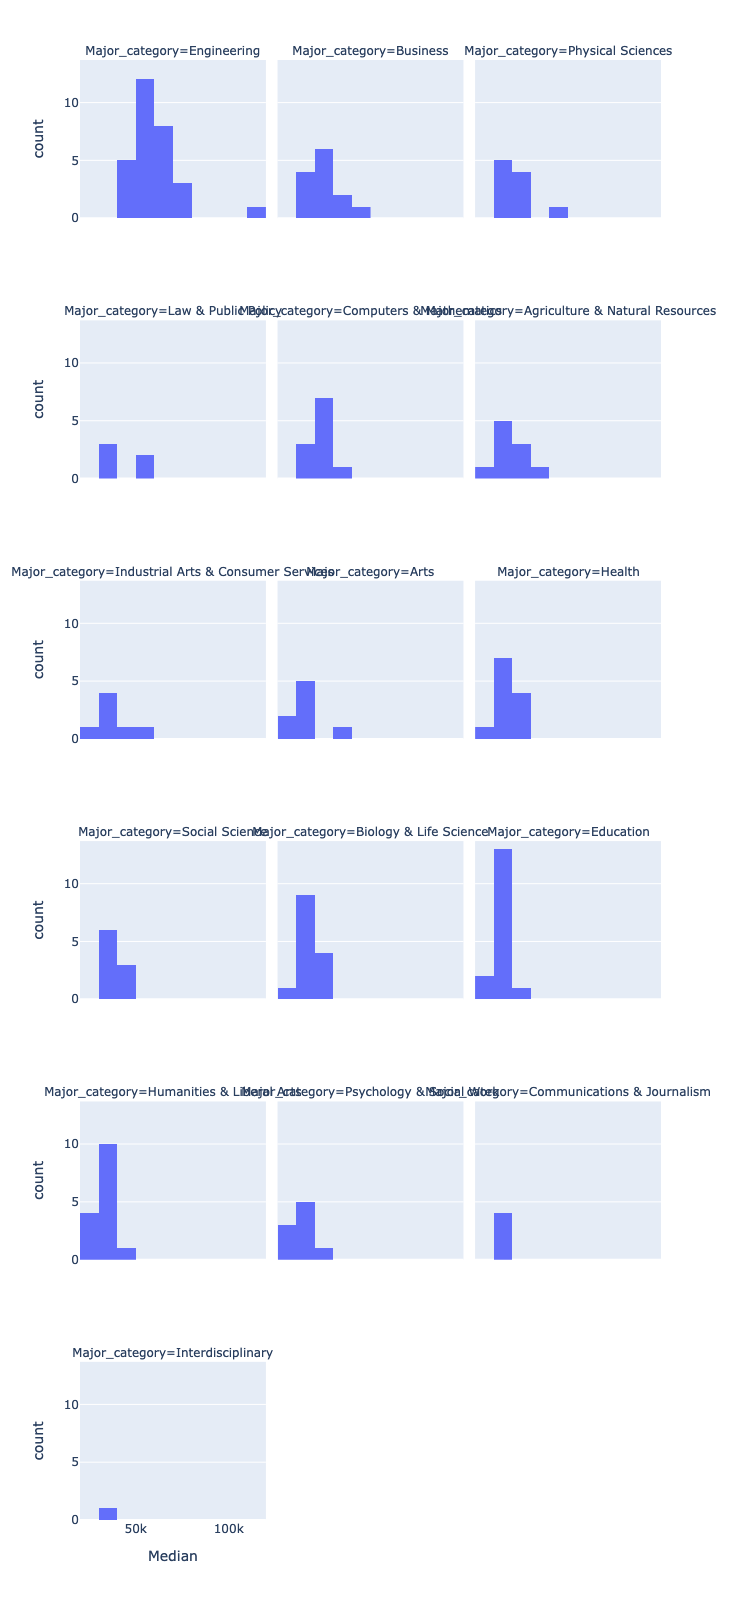

In [1317]:
# 3. histagram on median income for each major category
fig = px.histogram (DF_raw,
                   x='Median',
                    nbins=10,#go smoother
                   facet_col='Major_category',
                   facet_col_wrap=3)

fig.update_layout(autosize=False,
                 width=900,
                 height=1600)
fig.show()

#### Q2: Part 3; histogram (Practice Exam)
##### I chose 10 nbins for this histogram because the graph would appear smoother (clear relationship). Additionally, these histograms show the median income of each major category.

#### Q2: Part 3; median rather than mean (Practice Exam)
##### We choose the median, rather than the mean, to describe the typcial income of a group of people because a possible outlier can ruin the data. In other words, the data would be less reliable.

In [1320]:
#4. Which major category has the highest typical (you'll need to decide what this means) median income?
my_columns = ['Major_category','Median']
DF_raw[my_columns].groupby('Major_category').mean()

,Median
Major_category,
Agriculture & Natural Resources,36900.000000
Arts,33062.500000
Biology & Life Science,36421.428571
Business,43538.461538
Communications & Journalism,34500.000000
Computers & Mathematics,42745.454545
Education,32350.000000
Engineering,57382.758621
Health,36825.000000


#### Q2: Part 3; highest typical median income (Practice Exam)
##### I would argue that the "Engineering" major has the highest typical median income because it's significantly higher than any other major.

#### Q2: Part 3 (Practice Exam)
##### The distributions of median income across major categories isn't necessarily large. For example, the major with the lowest median income is 'Psychology & Social Work' with 30k, and the major with the highest median income is "Engineering' with 57k. So, every other major category that was listed (14) earned a median income in between those two quantities. Therefore, the median income is balanced across major categories.

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

#### Q3: Part 1 (Practice Exam)
##### All STEM fields are not the same in terms of job opportunities since the employment data is different in every major category.

In [1324]:
#Create DataFrame using mask for only STEM majors
some_stem = ['Major_category','Median','Women','Employed']
DF_stem = DF_raw[some_stem]
show(DF_stem)

mask = (DF_raw['Major_category']=='Biology & Life Science') | (DF_raw['Major_category']=='Computers & Mathematics') | (DF_raw['Major_category']=='Engineering') | (DF_raw['Major_category']=='Physical Sciences')
DF_STEM = DF_stem[mask]
show(DF_STEM)

##### I created a Data Frame for only STEM majors by creating created a data frame with only the 'Major_category', 'Median', 'Women', and 'Employed' columns. Then, I created a mask that would make the 'Major_category' column exactly equal to the prevously stated STEM majors. Finally, I created a new data frame with the mask.

In [1325]:
mask = (DF_raw['Major_category']=='Agriculture & Natural Resources') | (DF_raw['Major_category']=='Arts') | (DF_raw['Major_category']=='Business') | (DF_raw['Major_category']=='Communications & Journalism') | (DF_raw['Major_category']=='Education') | (DF_raw['Major_category']=='Health') | (DF_raw['Major_category']=='Humanities & Liberal Arts') | (DF_raw['Major_category']=='Industrial Arts & Consumer Services') | (DF_raw['Major_category']=='Interdisciplinary') | (DF_raw['Major_category']=='Law & Public Policy') | (DF_raw['Major_category']=='Psychology & Social Work') | (DF_raw['Major_category']=='Social Science')
DF_others = DF_stem[mask]
show(DF_others)

##### I created a data frame for every major that wasn't categorized as 'STEM' so I could complete the next question (this process was the same as the process for creating a data frame specifically for STEM majors).

In [1326]:
my_columns = ['Median','Major_category']
DF_STEM[my_columns].groupby('Major_category').median()

,Median
Major_category,
Biology & Life Science,36300.0
Computers & Mathematics,45000.0
Engineering,57000.0
Physical Sciences,39500.0


In [1327]:
my_columns = ['Median','Major_category']
DF_others[my_columns].groupby('Major_category').median()

,Median
Major_category,
Agriculture & Natural Resources,35000.0
Arts,30750.0
Business,40000.0
Communications & Journalism,35000.0
Education,32750.0
Health,35000.0
Humanities & Liberal Arts,32000.0
Industrial Arts & Consumer Services,35000.0
Interdisciplinary,35000.0


#### Q3: Part 1; STEM majors income compared to other majors (Practice Exam)
##### The total median for all (other) majors' median eanrings was $34541.67. Therefore, not one of the four STEM majors have median salaries equal to or less than the total median for all (other) majors' median earnings. 

In [1329]:
#what types of majors do women tend to major in?
variables = ['Women','Major','Major_category','Employed']
DF_raw[variables].sort_values('Women',ascending=False)

,Women,Major,Major_category,Employed
145,307087.0,PSYCHOLOGY,Psychology & Social Work,307933
34,187621.0,NURSING,Health,180903
123,168947.0,BIOLOGY,Biology & Life Science,182295
138,157833.0,ELEMENTARY EDUCATION,Education,149339
76,156118.0,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,276234
...,...,...,...,...
2,131.0,METALLURGICAL ENGINEERING,Engineering,648
52,109.0,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,559
1,77.0,MINING AND MINERAL ENGINEERING,Engineering,640
73,0.0,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,0


#### Q3: Part 2
##### Women tend to major in 'Psychology', 'Nursing', and 'Biology'.

In [1331]:
#women in STEM majors
variables = ['Women','Major_category']
DF_STEM[variables].sort_values('Women',ascending=False)

,Women,Major_category
123,168947.0,Biology & Life Science
97,35037.0,Physical Sciences
74,33607.0,Physical Sciences
41,32441.0,Computers & Mathematics
20,28576.0,Computers & Mathematics
...,...,...
33,232.0,Engineering
3,135.0,Engineering
2,131.0,Engineering
52,109.0,Computers & Mathematics


In [1332]:
# Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

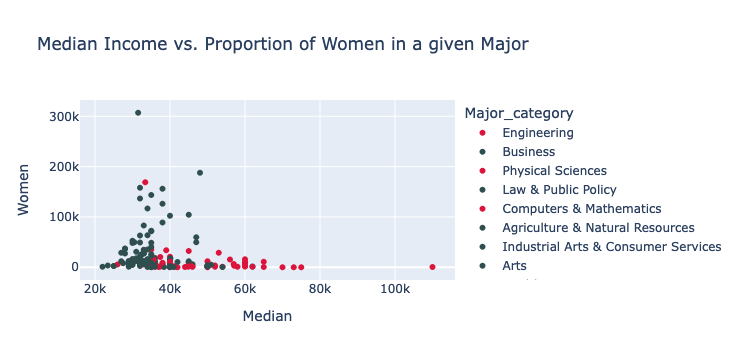

In [1333]:
fig = px.scatter(DF_raw,
                  x='Median',
                 y='Women',
                title='Median Income vs. Proportion of Women in a given Major',
                hover_data='Major_category',
                color='Major_category',
                 color_discrete_map = {'Biology & Life Science': 'crimson', 
                                       'Computers & Mathematics': 'crimson',
                                      'Engineering': 'crimson',
                                      'Physical Sciences': 'crimson',
                                      'Business':'darkslategrey',
                                      'Law & Public Policy':'darkslategrey',
                                      'Agriculture & Natural Resources': 'darkslategrey',
                                      'Industrial Arts & Consumer Services': 'darkslategrey',
                                      'Arts': 'darkslategrey',
                                      'Health': 'darkslategrey',
                                      'Social Science': 'darkslategrey',
                                      'Education': 'darkslategrey',
                                      'Humanities & Liberal Arts': 'darkslategrey',
                                      'Psychology & Social Work': 'darkslategrey',
                                      'Communications & Journalism': 'darkslategrey',
                                      'Interdisciplinary': 'darkslategrey'})
DF_scatter=fig
DF_scatter.show()

#### Q3: Part 2; scatterplot (Practice Exam)
##### All in all, I have found that there are fewer women that study in STEM majors (the STEM majors are colored 'red'). Additionally, I found that people with STEM majors usually have a higher salary.

### 4. Ask a question of interest to you.

In [1336]:
# How many majors (all) are working a part-time or full-time job?
important = ['Major','Major_category','Part_time']
DF_raw[important]

,Major,Major_category,Part_time
0,PETROLEUM ENGINEERING,Engineering,270
1,MINING AND MINERAL ENGINEERING,Engineering,170
2,METALLURGICAL ENGINEERING,Engineering,133
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,150
4,CHEMICAL ENGINEERING,Engineering,5180
...,...,...,...
168,ZOOLOGY,Biology & Life Science,2190
169,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,572
170,CLINICAL PSYCHOLOGY,Psychology & Social Work,648
171,COUNSELING PSYCHOLOGY,Psychology & Social Work,965


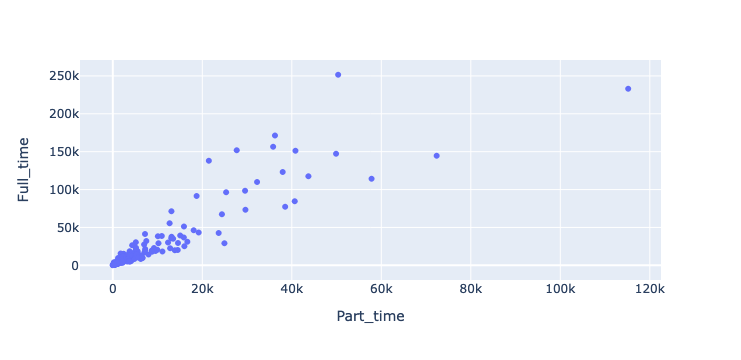

In [1337]:
fig = px.scatter(DF_raw,
                x='Part_time',
                y='Full_time',
                hover_data='Major')
fig.show()

#### Q4 (Practice Exam)
##### On average, people with majors tend to work full-time as opposed to part-time.